In [77]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from training_dash_app import classification_utils as utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
classified_file = r'/home/disk/eos4/jkcm/Data/MEASURES/zooniverse/classification_datasets/classify_128km-classifications_2019-05-02.csv'

In [79]:
data = utils.read_and_parse_classifications(classified_file, annotations_parser=utils.tidy_parser)
print('done')

done


In [80]:
class_counts = utils.count_number_of_classifications(data)
useful = sum([v for k,v in class_counts.items() if k[:4] not in ['No D', 'Othe']])
print(useful)
class_counts

1575


{'Closed-cell MCC': 151,
 'Clustered Cu': 435,
 'Disorg. MCC': 186,
 'No Dominant Type': 442,
 'Open-cell MCC': 62,
 'Other Issue': 386,
 'Stratus': 62,
 'Suppressed Cu': 679}

In [83]:
print(sum(class_counts.values()))

2403


{'Stratus': 0.025801081980857263, 'Clustered Cu': 0.18102372034956304, 'No Dominant Type': 0.18393674573449853, 'Disorg. MCC': 0.07740324594257178, 'Other Issue': 0.16063254265501456, 'Closed-cell MCC': 0.0628381190178943, 'Suppressed Cu': 0.28256346233874324, 'Open-cell MCC': 0.025801081980857263}


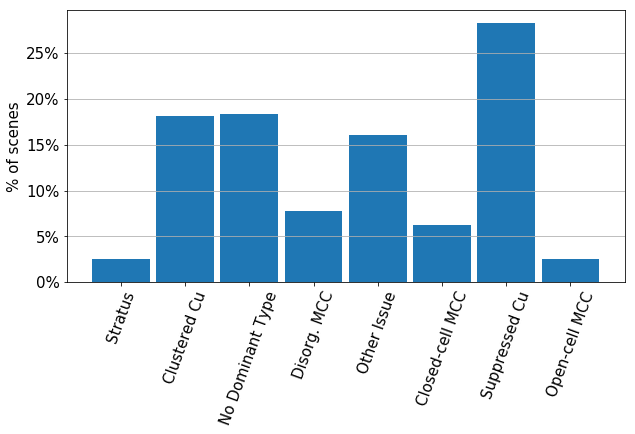

In [84]:
total = sum(class_counts.values())
to_plot = {k:v/total for k,v in class_counts.items()}# if k[:4] not in ['bad_', 'tota']}
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(np.arange(len(to_plot))*2, list(to_plot.values()), align='center', width=1.8)
plt.xticks(np.arange(len(to_plot))*2, list(to_plot.keys()), rotation=70, fontsize=15)
ax.yaxis.grid(True)
ax.set_ylabel("% of scenes", fontsize=15)
ax.set_yticklabels(["{:0.0%}".format(i) for i in ax.get_yticks()], fontsize=15)
fig.savefig('/home/disk/p/jkcm/plots/measures/manual_classifications_counts.png', bbox_inches='tight')
print(to_plot)

50.421743% are completed in less than 10 seconds
80.459231% are completed in less than 20 seconds


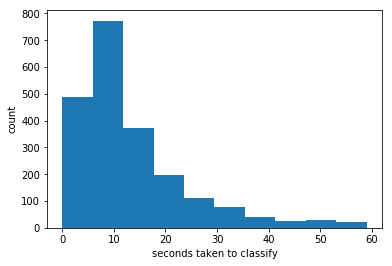

In [72]:
times = np.array([dt.datetime.strptime(i, '%Y-%m-%d %H:%M:%S UTC') for i in data.created_at.values])
deltas = np.array([i.total_seconds() for i in times[1:] - times[:-1]])
deltas = deltas[deltas<60] #these ain't real
fig, ax = plt.subplots()
ax.hist(deltas)
ax.set_xlabel('seconds taken to classify')
ax.set_ylabel('count');
print("{:%} are completed in less than 10 seconds".format(sum(deltas<10)/len(deltas)))
print("{:%} are completed in less than 20 seconds".format(sum(deltas<20)/len(deltas)))

In [85]:
users = data.user_name.values
user_count ={i: sum(users==i) for i in set(users)}
user_count

{'cloud_class': 543,
 'jmohrmann': 560,
 'kgmeyer': 46,
 'michaeldiamond': 57,
 'mwyant': 41,
 'reastman': 333,
 'robwood2': 821,
 'spennypacker': 2}

In [10]:
x = data[data.user_name == 'jmohrmann'].groupby('label').count().annotations

In [11]:
['{:.1%} of 1000 sample goal'.format(i) for i in x.values/1000]

['0.5% of 1000 sample goal',
 '8.1% of 1000 sample goal',
 '2.5% of 1000 sample goal',
 '1.8% of 1000 sample goal',
 '0.5% of 1000 sample goal',
 '1.1% of 1000 sample goal',
 '4.8% of 1000 sample goal',
 '1.9% of 1000 sample goal',
 '0.6% of 1000 sample goal',
 '0.4% of 1000 sample goal',
 '9.4% of 1000 sample goal']

In [12]:
x = data.groupby('label').count().annotations

In [14]:
x

label
bad_bowtie               25
bad_no_dominant_type    356
bad_other               125
bad_polar                90
bad_sun_glint            53
closed_mcc               96
clustered_cu            298
disorg_mcc               86
open_mcc                 43
solid_stratus            40
suppressed_cu           465
Name: annotations, dtype: int64

In [13]:
['{:.1%} of 1000 sample goal'.format(i) for i in x.values/1000]

['2.5% of 1000 sample goal',
 '35.6% of 1000 sample goal',
 '12.5% of 1000 sample goal',
 '9.0% of 1000 sample goal',
 '5.3% of 1000 sample goal',
 '9.6% of 1000 sample goal',
 '29.8% of 1000 sample goal',
 '8.6% of 1000 sample goal',
 '4.3% of 1000 sample goal',
 '4.0% of 1000 sample goal',
 '46.5% of 1000 sample goal']